## Arbitrary value imputation - pandas

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

To download the House Prices dataset, please refer to the lecture **Datasets** in **Section 2** of this course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [3]:
# Let's load the House Prices dataset.

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


Split the data set into a training and a testing set.

In [4]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [5]:
# Find missing data

X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [6]:
# Capture the variables to impute in a list.

vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

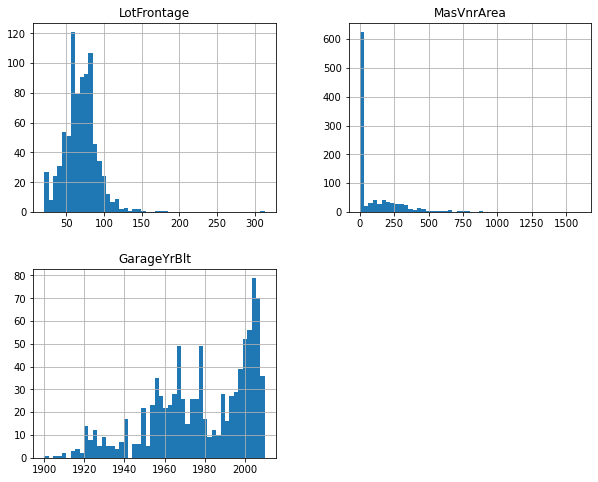

In [7]:
# Let's plot the distributions of the variables.

X_train[vars_to_impute].hist(bins=50, figsize=(10, 8))
plt.show()

In [8]:
X_train[vars_to_impute].agg(["min", "max"])

,LotFrontage,MasVnrArea,GarageYrBlt
min,21.0,0.0,1900.0
max,313.0,1600.0,2010.0


In [9]:
# Capture the imputation values in
# a dictionary

imputation_dict = {
    "LotFrontage": 999,
    "MasVnrArea": 1999,
    "GarageYrBlt": 2999,
}

imputation_dict

{'LotFrontage': 999, 'MasVnrArea': 1999, 'GarageYrBlt': 2999}

In [10]:
# Replace missing data

X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [11]:
# Corroborate replacement

X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [12]:
# Corroborate replacement

X_test.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64